In [2]:
import pandas as pd

dataFilePath = "incident_event_log.csv"
def LoadCSV(filePath):
    return pd.read_csv(filePath)
data = LoadCSV(dataFilePath)

# Exploration des données 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

Affichons les données par colonnes, pour se faire une premiére idée sur nos données

In [4]:
for column in data.columns:
    print(data[column].value_counts(),"\n\r")

INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0010023     2
INC0021538     2
INC0026436     2
INC0006883     2
INC0025043     2
Name: number, Length: 24918, dtype: int64 

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64 

True     116726
False     24986
Name: active, dtype: int64 

0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18       13
22        9
19        8
21        3
27        3
26        2
23        2
24        1
25        1
Name: reassignment_count, dtype: int64 

0    139398
1      1918
2       190
3     

Resolved by 15     15421
Resolved by 11     12050
Resolved by 103     5360
Resolved by 177     3811
Resolved by 53      3637
                   ...  
Resolved by 17         4
Resolved by 222        4
Resolved by 39         3
Resolved by 185        3
Resolved by 48         3
Name: resolved_by, Length: 217, dtype: int64 

?                  3141
3/6/2016 16:29       93
3/6/2016 16:28       85
3/6/2016 16:27       83
3/6/2016 16:31       59
                   ... 
29/4/2016 15:42       2
30/4/2016 02:04       2
31/3/2016 11:41       2
18/3/2016 15:32       2
12/4/2016 15:52       2
Name: resolved_at, Length: 18506, dtype: int64 

24/3/2016 18:59    3324
24/3/2016 18:50    2846
24/3/2016 18:40    2808
24/3/2016 19:00    2780
24/3/2016 19:01    2044
                   ... 
14/2/2017 11:15       2
5/5/2016 16:07        2
28/3/2016 20:59       2
21/5/2016 06:07       2
28/4/2016 22:07       2
Name: closed_at, Length: 2707, dtype: int64 



Varables catégoriques ordinales : impact urgency priority 

Voyons un peu plus en détail le nombre de valeurs nulles par colonnes

In [5]:
n=0
total = len(data["number"])
for column in data.columns:
    n = 0
    for i in range(len(data[column])):
        if(data[column][i] == '?'):
            n+=1
    print(column, "  ", n, "   ", n/total*100, "% de donnée(s) manquante(s)")

number    0     0.0 % de donnée(s) manquante(s)
incident_state    0     0.0 % de donnée(s) manquante(s)
active    0     0.0 % de donnée(s) manquante(s)
reassignment_count    0     0.0 % de donnée(s) manquante(s)
reopen_count    0     0.0 % de donnée(s) manquante(s)
sys_mod_count    0     0.0 % de donnée(s) manquante(s)
made_sla    0     0.0 % de donnée(s) manquante(s)
caller_id    29     0.020464039742576493 % de donnée(s) manquante(s)
opened_by    4835     3.4118493846674944 % de donnée(s) manquante(s)
opened_at    0     0.0 % de donnée(s) manquante(s)
sys_created_by    53076     37.45342666817207 % de donnée(s) manquante(s)
sys_created_at    53076     37.45342666817207 % de donnée(s) manquante(s)
sys_updated_by    0     0.0 % de donnée(s) manquante(s)
sys_updated_at    0     0.0 % de donnée(s) manquante(s)
contact_type    0     0.0 % de donnée(s) manquante(s)
location    76     0.053629897256407356 % de donnée(s) manquante(s)
category    78     0.0550412103421023 % de donnée(s) manqu

Nous pouvons d'ores et déjà supprimer certaines colonnes, car ils manquent énormément de valeurs pour pouvoir travailler avec elles.

In [6]:
def DeleteUselessColumns(data):
    data.drop(columns=["cmdb_ci", "problem_id", "rfc", "vendor", "caused_by"], inplace= True)
    
data_copy = data.copy()

DeleteUselessColumns(data_copy)

In [7]:
data_copy.duplicated().value_counts()

False    141712
dtype: int64

Pas de doublons dans le dataset

# Préparation des données

#### Transformons les données qui doivent l'être en remplaçant les ? quand cela est nescessaire

In [8]:
def ReplaceBy(data, columnName, replaceBy):
    for i in range(len(data[columnName])):
        if ("?" == data[columnName][i]):
            data[columnName][i] = replaceBy

In [9]:
def ReWriteColumns(data):
    
    #Rewrite caller_id
    ReplaceBy(data, "caller_id", "Caller 0")    
    
    #Rewrite resolved_at
    for i in range(len(data_copy.resolved_at)):
        if(data_copy["resolved_at"][i] == '?'):
            data_copy["resolved_at"][i] = data_copy["closed_at"][i] 
    
    #Rewrite opened_by
    ReplaceBy(data, "opened_by", "Opened by  0")

    #Rewrite sys_created_by
    ReplaceBy(data, "sys_created_by", "Created by 0")
    
    #Rewrite sys_created_at
    ReplaceBy(data, "sys_created_at", "01/01/1990 00:01")
    
    #Rewrite location
    ReplaceBy(data, "location", "Location 0")
    
    #Rewrite category
    ReplaceBy(data, "category", "Category 0")
    
    #Rewrite subcategory
    ReplaceBy(data, "subcategory", "Subcategory 0")
    
    #Rewrite u_symptom
    ReplaceBy(data, "u_symptom", "Symptom 0")
    
    #Rewrite assignment_group
    ReplaceBy(data, "assignment_group", "Group 0")
    
    #Rewrite assigned_to
    ReplaceBy(data, "assigned_to", "Resolver 0")
    
    #Rewrite closed_code
    ReplaceBy(data, "closed_code", "code 0")
    
    #Rewrite resolved_by
    ReplaceBy(data, "resolved_by", "Resolved by 0")
    
ReWriteColumns(data_copy)

D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Conversion des données

In [11]:
def ToNumeric(dataframe, columnName, toCutID):
    for i in range(len(dataframe[columnName])):
        dataframe[columnName][i] = int(dataframe[columnName][i][toCutID:])
        
    dataframe[columnName] = pd.to_numeric(dataframe[columnName])    
    print(columnName, " conversion to numeric : Done")
    
def LeftToNumeric(dataframe, columnName, toCutID):
    for i in range(len(dataframe[columnName])):
        dataframe[columnName][i] = int(dataframe[columnName][i][:toCutID])
        
    dataframe[columnName] = pd.to_numeric(dataframe[columnName])    
    print(columnName, " conversion to numeric : Done")
    
# Cette fonction peut être nécessaire dans un autre context. Dans le notre, elle n'est pas vraiment utile.
def IsNumberFormated(dataframe):
    isFormated = True
    for i in range(len(data_copy.number)):
        if(data_copy.number[i][0:3] != "INC" ):
            isFormated = False
            break;
    return isFormated

def FormatColumns(dataframe):    
    
    # -- Numeric -- 
    
    if(IsNumberFormated(dataframe) == False):
        print("Une erreur est survenue")
    else:
    
    # Convert Number 
        ToNumeric(dataframe,"number", 3)    
    
    # Convert Caller_id
        ToNumeric(dataframe, "caller_id", 7)
    
    # Convert opened_by
        ToNumeric(dataframe, "opened_by", 11)
    
    # Convert sys_created_by
        ToNumeric(dataframe, "sys_created_by", 11)
    
    # Convert sys_updated_by
        ToNumeric(dataframe, "sys_updated_by" ,11)

    # Convert location
        ToNumeric(dataframe, "location" ,9)
    
    # Convert category
        ToNumeric(dataframe, "category", 9)
    
    # Convert subcategory
        ToNumeric(dataframe, "subcategory", 12)
    
    # Convert u_symptom
        ToNumeric(dataframe, "u_symptom", 8)
    
    # Convert impact
        LeftToNumeric(dataframe, "impact", 1)
    
    # Convert urgency
        LeftToNumeric(dataframe, "urgency", 1)
    
    # Convert priority
        LeftToNumeric(dataframe, "priority", 1)
    
    # Convert assignment_group
        ToNumeric(dataframe, "assignment_group", 6)    
    
    # Convert assigned_to
        ToNumeric(dataframe, "assigned_to", 9)    
    
    # Convert closed_code
        ToNumeric(dataframe, "closed_code", 5)    
    
    # Convert resolved_by
        ToNumeric(dataframe, "resolved_by", 12)     

def ConvertDateTimes(dataframe):

    # -- DateTime -- 

    # Convert opened_at
    dataframe["opened_at"] = pd.to_datetime(dataframe["opened_at"], dayfirst = True)

    # Convert sys_updated_at
    dataframe["sys_updated_at"] = pd.to_datetime(dataframe["sys_updated_at"], dayfirst = True)

    # Convert resolved_at
    dataframe["resolved_at"] = pd.to_datetime(dataframe["resolved_at"], dayfirst = True)

    # Convert sys_created_at
    dataframe["sys_created_at"] = pd.to_datetime(dataframe["sys_created_at"], dayfirst = True)

    #Convert closed_at
    dataframe["closed_at"] = pd.to_datetime(dataframe["closed_at"], dayfirst = True)

    
FormatColumns(data_copy)
ConvertDateTimes(data_copy)

print("all done")

D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


number  conversion to numeric : Done
caller_id  conversion to numeric : Done
opened_by  conversion to numeric : Done
sys_created_by  conversion to numeric : Done
sys_updated_by  conversion to numeric : Done
location  conversion to numeric : Done
category  conversion to numeric : Done
subcategory  conversion to numeric : Done
u_symptom  conversion to numeric : Done


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


impact  conversion to numeric : Done
urgency  conversion to numeric : Done
priority  conversion to numeric : Done
assignment_group  conversion to numeric : Done
assigned_to  conversion to numeric : Done
closed_code  conversion to numeric : Done
resolved_by  conversion to numeric : Done
all done


In [12]:
data_copy.to_csv("convertedData")

In [13]:
def VariableCible(dataframe):
    resolution_time = []
    for i in range(len(data_copy["closed_at"])):
        newtime = (data_copy["closed_at"][i] - data_copy["sys_updated_at"][i]).seconds/60 + (data_copy["closed_at"][i] - data_copy["sys_updated_at"][i]).days*24*60
        if(newtime < 0):
            print(data_copy.number[i], i)
            return
        resolution_time.append(newtime)
    return resolution_time

#data_copy = data_copy.copy()
data_copy["resolution_time"] = VariableCible(data_copy)
#VariableCible(data_copy)

In [14]:
data_copy = pd.get_dummies(data_copy)
data_copy['const'] = 1

datatime_columns = ["opened_at", "sys_created_at", "sys_updated_at", "closed_at", "resolved_at"]
for i in range(len(datatime_columns)):
    data_copy[datatime_columns[i]] = pd.to_timedelta(data_copy[datatime_columns[i]], unit='ns').dt.total_seconds().astype(int)

D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


### matrice de corrélation

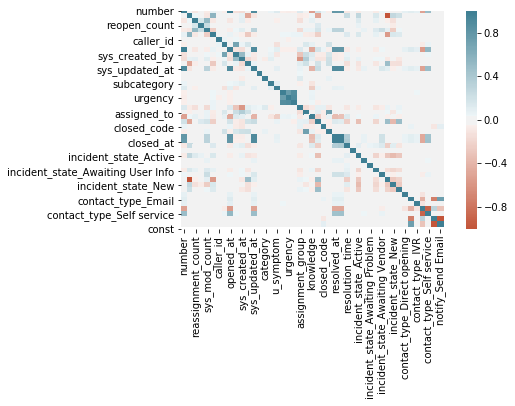

In [16]:
import seaborn as sns
matriceDeCorrelation = data_copy.corr()

sns.heatmap(matriceDeCorrelation, cmap = sns.diverging_palette(20,220, n = 200)) #square = True

In [17]:
print(matriceDeCorrelation)

                                     number    active  reassignment_count  \
number                             1.000000 -0.036933           -0.095671   
active                            -0.036933  1.000000            0.043323   
reassignment_count                -0.095671  0.043323            1.000000   
reopen_count                      -0.003810  0.019083            0.160193   
sys_mod_count                     -0.063748 -0.097202            0.527919   
made_sla                           0.072568  0.565501           -0.089037   
caller_id                          0.005353  0.004639            0.001346   
opened_by                         -0.046663 -0.001119           -0.022047   
opened_at                          0.996847 -0.034049           -0.091220   
sys_created_by                    -0.120518  0.029872            0.011446   
sys_created_at                    -0.150116  0.082580            0.092716   
sys_updated_by                     0.030843 -0.489542           -0.054394   

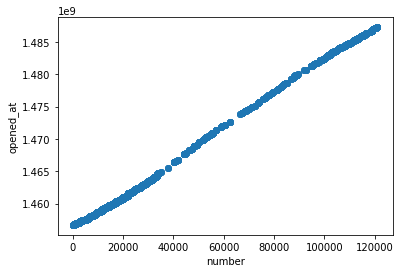

In [26]:
x = range(0,len(data_copy["opened_at"]))
x = data_copy["number"]
y = data_copy["opened_at"]
plt.scatter(x, y)
plt.xlabel('number')
plt.ylabel('opened_at')

plt.show()

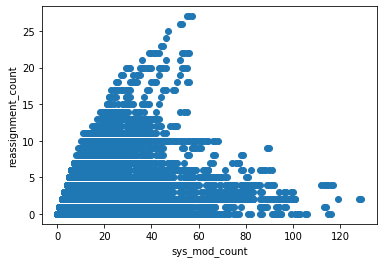

In [27]:
x = range(0,len(data_copy["sys_mod_count"]))
x = data_copy["sys_mod_count"]
y = data_copy["reassignment_count"]
plt.scatter(x, y)
plt.xlabel('sys_mod_count')
plt.ylabel('reassignment_count')

plt.show()

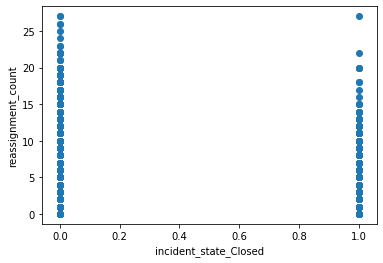

In [28]:
x = range(0,len(data_copy["incident_state_Closed"]))
x = data_copy["incident_state_Closed"]
y = data_copy["reassignment_count"]
plt.scatter(x, y)
plt.xlabel('incident_state_Closed')
plt.ylabel('reassignment_count')

plt.show()

On essaie de prédire le temps de résolution d'un incident. On donc 2 variables possibles : closed_at et resolved_at.

La premiére est la date et l'heure à laquelle l'incident a été fermé, et la deuxiéme est la date et l'heure de sa résolution.

Il faut donc faire un choix entre une de ces 2 variables. Visualisons les pour identifier leur corrélation et différences. Il faut au préalable caster les valeurs en datetime.

De plus, certaines valeurs dans la colonnes "resolved_at" sont manquantes. On a donc fait le choix de les remplacer par la valeur de la colonne "close_at" correspondant au même incident, étant donnée que l'on souhaite prédire le temps de résolution de ce dernier.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

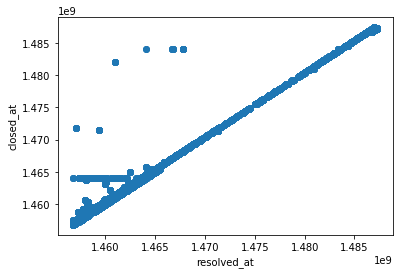

In [33]:
x = range(0,len(data_copy["number"]))
y = data_copy["closed_at"]
x = data_copy["resolved_at"]
plt.scatter(x, y)
plt.xlabel('resolved_at')
plt.ylabel('closed_at')

plt.show()

Il y a bien une corrélation entre les 2 variables. 

On a désormais 2 possibilités pour choisir la variable cible :
    - choisir la variable "closed_at", car (on suppose) qu'elle confirme de par sa présence que l'incident est bien terminé
    - choisir la variable "resolved_at", car elle indique la date de résolution de l'incident.
    
Il aurait fallu avoir plus de renseignement sur ces variables, par exemple par des spécialistes du métier, pour avoir le choix le plus juste possible. 

Pour cette étude, nous choisirons la variable "closed_at" qui nous est imposé.

In [34]:
matriceDeCorrelation["resolution_time"].sort_values(ascending = False)

resolution_time                      1.000000
closed_at                            0.393380
resolved_at                          0.366085
active                               0.248691
made_sla                             0.139692
incident_state_Awaiting Vendor       0.130205
knowledge                            0.123137
incident_state_New                   0.119084
sys_created_at                       0.100250
incident_state_Active                0.099585
incident_state_Awaiting User Info    0.081246
sys_created_by                       0.060981
incident_state_Awaiting Problem      0.053477
resolved_by                          0.036904
sys_mod_count                        0.032919
reassignment_count                   0.029878
opened_by                            0.025018
impact                               0.020544
priority                             0.020195
urgency                              0.019666
incident_state_Awaiting Evidence     0.018538
assigned_to                       

# Régression

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [30]:
def TrainAndFit(donnee, cible, test_set_donnee , test_set_cible):
    lin_reg = LinearRegression()
    lin_reg.fit(donnee, cible)
    
    predictions = lin_reg.predict(test_set_donnee)
    lin_mse = mean_squared_error(test_set_cible, predictions)
    lin_rmse =np.sqrt(lin_mse)
    return lin_rmse
    #return lin_reg.score(test_set_donnee, test_set_cible)
    
def GetPValues(donnee, cible):
    Y = cible.astype(float)
    X = donnee.astype(float)
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    results_summary = results.summary()
    
    results_as_html = results_summary.tables[1].as_html()
    resultDF = pd.read_html(results_as_html, header=0)[0]
    resultDF["columnName"] = resultDF["Unnamed: 0"]
    resultDF = resultDF.drop(columns = "Unnamed: 0")
    toReturn = resultDF.sort_values(by = "P>|t|", ascending = False).iloc[0]   
    if(toReturn["columnName"] == 'const'):
        return resultDF.sort_values(by = "P>|t|", ascending = False).iloc[1]
    return toReturn


def GetBestScore(train_set, test_set):
    
    donnee = train_set.drop(columns = ["resolved_at", "closed_at","resolution_time"])
    cible = train_set["resolution_time"]
    
    maxPValue = GetPValues(donnee, cible)
    
    while maxPValue["P>|t|"] > 0.05:

        print("la pvalue max est ", maxPValue["columnName"], maxPValue["P>|t|"])

        train_set = train_set.drop(columns = maxPValue["columnName"])
        test_set = test_set.drop(columns = maxPValue["columnName"])
        
        donnee = train_set.drop(columns = ["resolved_at", "closed_at","resolution_time"])
        cible = train_set["resolution_time"]
        
        test_set_donnee = test_set.drop(columns = ["resolved_at", "closed_at","resolution_time"])
        test_set_cible = test_set["resolution_time"]
        
        result = TrainAndFit(donnee, cible, test_set_donnee , test_set_cible)

        print("Le score est désormais de ", result, "en supprimant ", maxPValue["columnName"])

        maxPValue = GetPValues(donnee, cible)
    
    
data_copy3 = data_copy.copy()
train_set, test_set = train_test_split(data_copy3, test_size=0.2, random_state=42)

GetBestScore(train_set, test_set)

D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  active 0.9059999999999999
Le score est désormais de  26571.20589049432 en supprimant  active


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  incident_state_Awaiting Vendor 0.883
Le score est désormais de  26571.205890312434 en supprimant  incident_state_Awaiting Vendor


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  impact 0.8370000000000001
Le score est désormais de  26571.307814929765 en supprimant  impact


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  urgency 0.516
Le score est désormais de  26571.400340753873 en supprimant  urgency


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  contact_type_Self service 0.483
Le score est désormais de  26571.400340860386 en supprimant  contact_type_Self service


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  notify_Do Not Notify 0.446
Le score est désormais de  26571.400340824097 en supprimant  notify_Do Not Notify


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  notify_Send Email 0.647
Le score est désormais de  26571.47048540766 en supprimant  notify_Send Email


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  reopen_count 0.295
Le score est désormais de  26571.49107302415 en supprimant  reopen_count


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  u_priority_confirmation 0.34700000000000003
Le score est désormais de  26571.361481845015 en supprimant  u_priority_confirmation


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  u_symptom 0.24100000000000002
Le score est désormais de  26571.69231614522 en supprimant  u_symptom


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  contact_type_Direct opening 0.191
Le score est désormais de  26571.65019050192 en supprimant  contact_type_Direct opening


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  caller_id 0.16399999999999998
Le score est désormais de  26571.500508364155 en supprimant  caller_id


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  number 0.11
Le score est désormais de  26572.475255114263 en supprimant  number


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  subcategory 0.10800000000000001
Le score est désormais de  26572.824150011907 en supprimant  subcategory


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  sys_created_by 0.087
Le score est désormais de  26573.064377157763 en supprimant  sys_created_by


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  sys_created_at 0.23600000000000002
Le score est désormais de  26573.91197176241 en supprimant  sys_created_at


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


la pvalue max est  contact_type_IVR 0.07200000000000001
Le score est désormais de  26574.11136950923 en supprimant  contact_type_IVR


D:\EcoleESILVA4\App\PythonAnaconda\Install\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
data_copy["resolution_time"].describe()

count    141712.000000
mean      15178.864740
std       28100.538864
min           0.000000
25%        7218.000000
50%        7514.000000
75%       15913.000000
max      491435.000000
Name: resolution_time, dtype: float64